In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / 255.0  # 이미지 숫자 값으 0~1 사이로 바꾸기 원래는 0~255 사이(픽셀 값)
x_test = x_test / 255.0 # /255.0 하면 0~1 범위로 정규화 됨 -> 이러면 학습이 더 잘 됨 (속도도 빠름)

# 레이블을 원-핫 인코딩, 정답 숫자를 딥러닝용 포맷으로 바꾸기
y_train = to_categorical(y_train, 10) # 예 : 숫자 3 -> [0,0,0,1,0,0,0,0,0,0] (10개 중 3번 째 칸이 1) 
y_test = to_categorical(y_test, 10) 

# 모델 만들기
model = Sequential([ # sequential : 층을 순서대로 쌓음 
    Flatten(input_shape=(28, 28)),     # 28x28 -> 784로 펼치기 # Flatten: 이미지를 (28X28) 를 1차원 벡터(784길이)로 펼치기 -> DNN은 펼쳐서 넣어야 함
    Dense(128, activation='relu'),     # 은닉층 1 # Dense(128, activation='relu'): 뉴런 128개짜리 은닉층 , relu: 활성화 함수 (양수는 그대로, 음수는 0)
    Dense(64, activation='relu'),      # 은닉층 2 # Dense(64, activation='relu') : 또다른 은닉층 (뉴런 64개) 
    Dense(10, activation='softmax')    # 출력층 # Dense(10, activation='softmax') : 출력층 (0~9 숫자 중 1개 고르기 위해 뉴런 10개) 
    # softmax : 확률로 변환 (가장 높은 확률이 예측 결과) 
])

# 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # optimizer = 'adam' : 학습방법-> 가중치들을 자동으로 잘 조절해줌
# loss='categorical_crossentropy : 손실함수 -> 예측이 틀릴 수록 값이 커지고, 맞을수록 작아짐(다중 분류용) 
# metrics = ['accuracy'] : 학습하면서 정확도도 같이 측정하겠다


# 학습
model.fit(x_train, y_train, epochs=5, batch_size=32)
# epochs=5 : 전체 데이터셋을 5번 반복해서 학습 
# batch_size=32 : 한번에 32개씩 데이터를 모델에 넣고 가중치 업데이트 


# 평가
test_loss, test_acc = model.evaluate(x_test, y_test) # model.evaluate() : 테스트 데이터로 정확도와 손실값 확인 
print(f"Test accuracy: {test_acc}") # print()로 정확도 출력 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


C:\Users\min22\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8810 - loss: 0.4164
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9666 - loss: 0.1080
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9786 - loss: 0.0691
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9833 - loss: 0.0490
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9873 - loss: 0.0394
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9707 - loss: 0.1043
Test accuracy: 0.9745000004768372


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


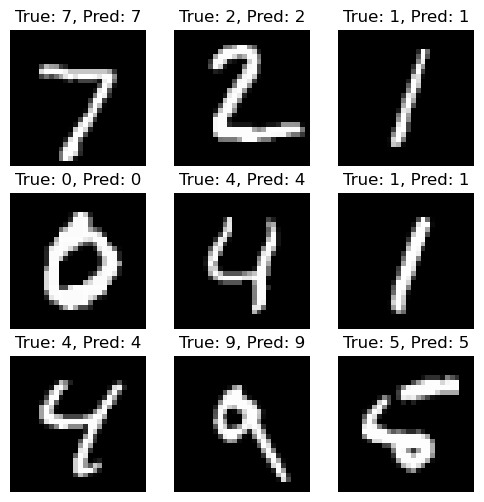

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 테스트 데이터에서 9장 뽑아서 예측해 보기
predictions = model.predict(x_test[:9])  # x_test[:9] : 테스트 데이터 중 앞에 있는 9장만 선택
#  model.predict(): 이미지를 넣으면 모델이 예측 확률을 반환해줌 

plt.figure(figsize=(6,6)) # 6X6 사이즈로 9장의 이미지 그릴 준비 
for i in range(9):
    plt.subplot(3,3,i+1) # 3x3 격자 중에서 위치 정하기 
    plt.imshow(x_test[i], cmap='gray')
    true_label = np.argmax(y_test[i])            # 원래 정답
    predicted_label = np.argmax(predictions[i])  # 모델 예측 , predictions[i]는 10개의 확률 값임, np.argmax() 쓰면 가장 확률 높은 숫자를 예측 결과로 뽑음
    plt.title(f"True: {true_label}, Pred: {predicted_label}") # True : 실제 정답 숫자, Pred : 모델이 예측한 숫자
    plt.axis('off')
plt.show()